### Exploratory data analysis on the titanic dataset

In [93]:
from IPython.display import Image
Image(url= "titanicpic.jpg", width=300, height=100)

#### 1. Let us try to understand the dataset first. It has 12 columns.

##### Here we have 11 features using which we shall predict the target variable which is ‘Survived’.

##### The target variable is the one which we are trying to predict. Others are the features. Our first step would be to polish the features so that it can be used to input to a machine learning model which we can use to do our required task.

#### 2. Here we are going to import all the libraries which would be required to do the data analysis stuffs. And then next we load our data using the pandas built in method: .read_csv() and to visualize some data we use the .head()

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
train=pd.read_csv('train.csv')

In [53]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### 3. So here we trully begin the data analysis stuff. So the first thing which we need to do is find out the null (nan) values in our dataset , or prominently speaking which columns contain the null values.

#### So one way of doing it is by using the pandas built in .isnull() method and find out the null values. But as there are many a values all of it cannot be shown by the pandas data frame. Still lets see it

In [54]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##### So we would now use heatmap in the seaborn library which would help us to vizualize all the null values present in different columns highlighted in different colors as:

<AxesSubplot:>

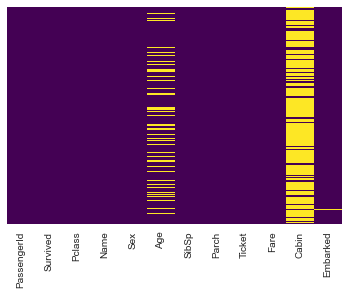

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### And as we see we find that there are null values in the Age(about 20%) and the Cabin(about 80%) columns.

#### 4. So before dealing with the null values we need to draw miore insights from the data which we have. Basically we need to act like detectives. So lets do it.

#### a. So the first thing ehich we would try to look and vizualize is the number of people who have and havent survived using the countplot as follows:

<AxesSubplot:xlabel='Survived', ylabel='count'>

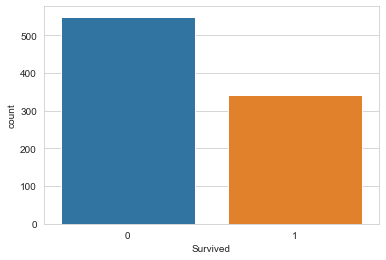

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

##### So we see that more number of people were deceased in this incident

#### b. Next we are going to see how many people survived with respect to their gender i.e. here in the countplot we are going to have parameter hue='Sex'

<AxesSubplot:xlabel='Survived', ylabel='count'>

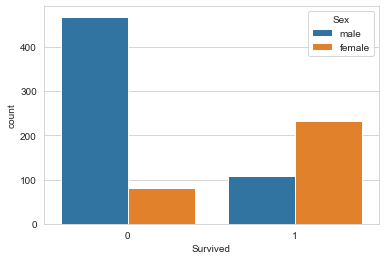

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue="Sex",data=train)

##### So here we can make an important observation. We have seen in the film that the women and child were rescued first and then the male were rescued later. So from our dataset we can also see that more number of female had survived because they were rescued first and so 'Sex' and 'Survived' are related with each other.

##### c. Next another important thing which we can observe is that if there exsist any relation between the people who had survived and the class in which they were travelling. So lets visualize it first as:

<AxesSubplot:xlabel='Survived', ylabel='count'>

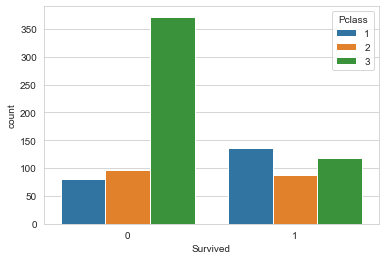

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

##### Again here we can make an important inference. In the movie we had seen that the 1st class passengers were rescued first followed by 2nd class and very less 3rd class.
##### So here also we see that most of the people who survived were from 1st class and most of the deceased were from the 3rd class

##### d. Next we are going to analyze another important thing which is the count of siblings and spouse of every registered passenger as it would help us to find the number of people who had survived and we do it as:

<AxesSubplot:xlabel='SibSp', ylabel='count'>

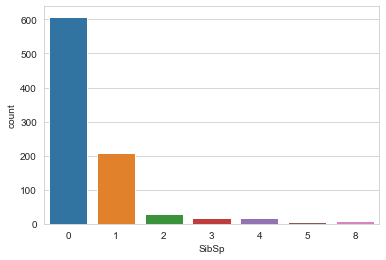

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=train)

##### So we can make another interesting observation that most of the passengers travelling did not have any child or spouse and quite a few of them had only 1 either a child or spouse.

### e. We are also going to analyze the distribution of the fare payed by different passengers in the form of histograms which would give us the count of values in each range. We do it as:

C:\Users\PRANJAL CHAKRABORTY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

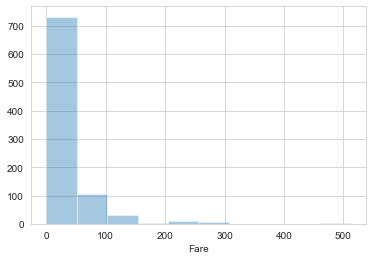

In [60]:
sns.set_style('whitegrid')
sns.distplot(train['Fare'],kde=False,bins=10)

#### f. And lastly we are going to analyze the age of all the passengers in the form of histograms by dropping the null values and we do it as:

<AxesSubplot:xlabel='Age'>

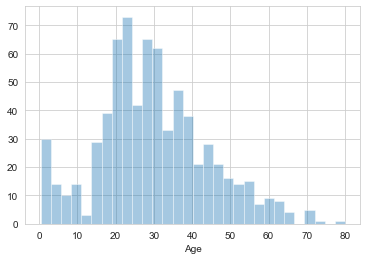

In [61]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

#### So we can observe here that the Age column follows roughly a normal distribution and that most of the passengers were between the age range: 19-40

### 4. Now here we would start our data cleaning process.

#### a. First we have the column 'Age' which have about 20% of null values. Now as Age is a numerical feature so we can replqace the null values by the mean or the central most value of the whole Age data series.

##### But before that we try to see and figure out which columns are highly corelated with the age and we can do it by finding the corelation and then visualizing it with heatmap as:

<AxesSubplot:>

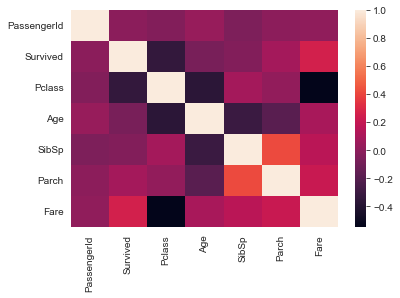

In [62]:
sns.heatmap(train.corr())

In [63]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### b. So here we find that Age and Pclass are highly correlated with eachother so we can use the Pclass feature to find the missing Age values. So what we do is we divide our data based on Pclass values anf for each Pclass group we first visualize the distribution of ages using boxplot and then from the 50 percentile we find the mean age of all the groups and assingn this mean age values as to the null values.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

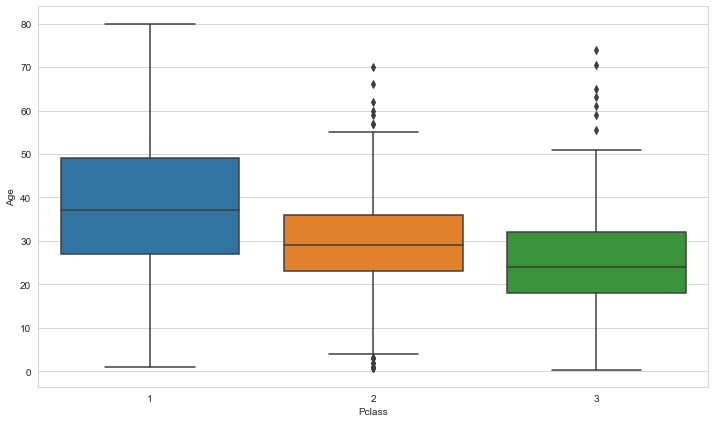

In [64]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=train)

#### So here we can see from this boxplots that the mean age of Pclass==1 is around 37, for Pclass==2 it is around 29 and for Pclass==3 it is 25. So we would replace the missing Age values of each of the Pclass with this mean values. And we do it with the help of a function called as impute_age() which takes all the ages and returns the missing age by replacing it with the mean age as follows:

In [65]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        elif pclass==3:
            return 25
    else:
        return age

In [66]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

#### Next we would try to vizualize with heatmap whether the 'Age' contains any null value or not and we do it as:

<AxesSubplot:>

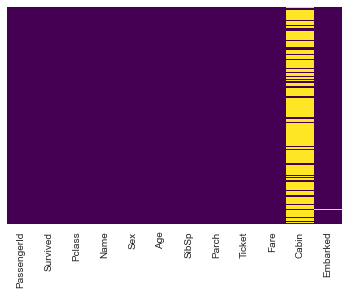

In [67]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### c. So here we observe that all the null values of the 'Age' has been replaced with some values. And we are left with 'Cabin' which contains the null values. But we encounter that there are some null values in our 'Embarked' column too. To replace this null values we would replace it with the values which occurs the most in the 'Embarked' column (taking mode) as 'Embarked' is a categorical feature. 

In [68]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
def impute_embark(cols):
    if pd.isnull(cols):
       return 'S'
    else:
        return cols

In [70]:
train['Embarked']=train['Embarked'].apply(impute_embark)

<AxesSubplot:>

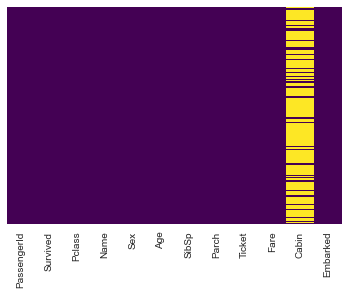

In [71]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### And here we can see again from the heatmap that there are no null values in the 'Embarked' column....bam!!!

##### d. Next we would try to handle the missing values in the 'Cabin' column. But we can see that almost 80% of the values are null here. So we drop this feature even though we could have done feature enginnering but its slightly out of scope for this moment.

In [72]:
train.drop(columns='Cabin',inplace=True)

<AxesSubplot:>

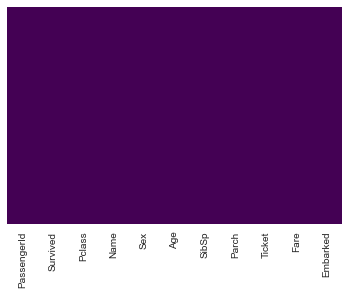

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### And here we can see from the heatmap that our 'Cabin' column has been dropped and now our data is all clean containing no null values. So we have completed most of the part....baaammm!!

### 5. This is yet another interesting part where we are going to handle the categorical variables and drop the features whic are not required.

#### a. So our first task is to convert the categorical features: 'Sex' and 'Embarked' to some numerical values so that our prediction model can take it as input to make the predictions more accurate. So we do it using the pandas built in method called as : .get_dummies( ) which converts each categorical values of 'Sex' and 'Embarked' to numeric ones.

In [74]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [75]:
print(sex)
print(embark)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]
     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]


#### b. So here we have now converted our categorical features into its numerical dummies. So our next step is to eliminate thefeatures which we wont require like: 'Name' , 'Ticket' and the categorical features like: 'Sex' , 'Embarked'

In [76]:
train.drop(columns=['Sex','Embarked','Name','Age'],inplace=True)

##### And then we finally need to concatenate the the dummies created of 'Sex' and 'Embarked' to the original exsisting dataframe as follows:

In [81]:
train=pd.concat([train,sex,embark],axis=1)
train.drop(columns='Ticket',inplace=True)

In [82]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,0,0,8.0500,1,0,1,1,0,1


### 6. So now we are going to implement the logistic regression part to train our model and predict the people who have survived.

#### a. So our first step is to perform the train test split i.e. organizing our dataset to train our model as well as test the model to predict the people survived.

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

#### b. Next we create our logistic regression model, first we import the logistic regression and then initialize it and finally use the .fit( ) to train our model. And then it predicts the data based on the values provided from the x_test

In [84]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\PRANJAL CHAKRABORTY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
predictions=logmodel.predict(x_test)

#### c. Next we need to go and see the confusion matrix to view how our model performed and also to determine its accuracy

In [88]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)

In [89]:
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

##### We can also view the accuracy in terms of percentage or what we call the accuracy score as follows:

In [90]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)

In [91]:
accuracy

0.7761194029850746

#### So double baaammm!!!! . What we are now seeing is that just by applying a simple logistic regression model our values are predicted with quite a high accuracy of 77% at the first go. So now if we can apply some other complex algorithms then we would pretty surely increase this accuracy to some what 96% which would give us a push to explore this field and grow in it.